<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Recommendation Engine</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [71]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', None)
plt.style.use('seaborn-darkgrid')

In [72]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [73]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [74]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [75]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [76]:
df.hair = df.hair.astype('category')
df.feathers = df.feathers.astype('category')
df.eggs = df.eggs.astype('category')
df.milk = df.milk.astype('category')
df.airborne = df.airborne.astype('category')
df.aquatic = df.aquatic.astype('category')
df.predator = df.predator.astype('category')
df.toothed = df.toothed.astype('category')
df.backbone = df.backbone.astype('category')
df.breathes = df.breathes.astype('category')
df.venomous = df.venomous.astype('category')
df.fins = df.fins.astype('category')
df.legs = df.legs.astype('category')
df['tail'] = df['tail'].astype('category')
df.domestic = df.domestic.astype('category')
df.catsize = df.catsize.astype('category')
df.type = df.type.astype('category')

In [77]:
df.describe(include='all')

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
unique,100,2,2,2,2,2,2,2,2,2,2,2,2,6,2,2,2,7
top,frog,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,1
freq,2,58,81,59,60,77,65,56,61,83,80,93,84,38,75,88,57,41


In [78]:
df.drop(['animal name'], axis=1, inplace= True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [79]:
values = df.values

In [80]:
df.shape

(101, 17)

In [81]:
X = values[:,:-1]
Y = values[:,-1]
X.shape, Y.shape

((101, 16), (101,))

In [82]:
X.shape, Y.shape

((101, 16), (101,))

### parameter tuning

In [83]:
grid_params = {'n_neighbors':np.arange(2,50), 
                 'weights':['uniform'], 'metric':['euclidean', 'manhattan']}

gs = GridSearchCV(
      KNeighborsClassifier(),
      grid_params,
      verbose=1,
      cv = 4,
      n_jobs=-1)
gs_results = gs.fit(X, Y)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    2.8s finished


In [84]:
gs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [85]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [86]:
gs.best_score_

0.9407692307692308

### Final Model Build

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state = 2)

In [88]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform')

In [89]:
model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [90]:
predicted = model.predict(X_test)

In [91]:
pd.crosstab(predicted, y_test)

col_0,1,2,3,4,5,6,7
row_0,,,,,,,
1,12,0,0,0,0,0,0
2,0,8,0,0,0,0,0
4,0,0,1,2,0,0,0
5,0,0,0,0,2,0,0
6,0,0,0,0,0,2,0
7,0,0,0,0,0,0,4


In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.967741935483871

### some visualizations

Text(0.5, 0, 'Predator')

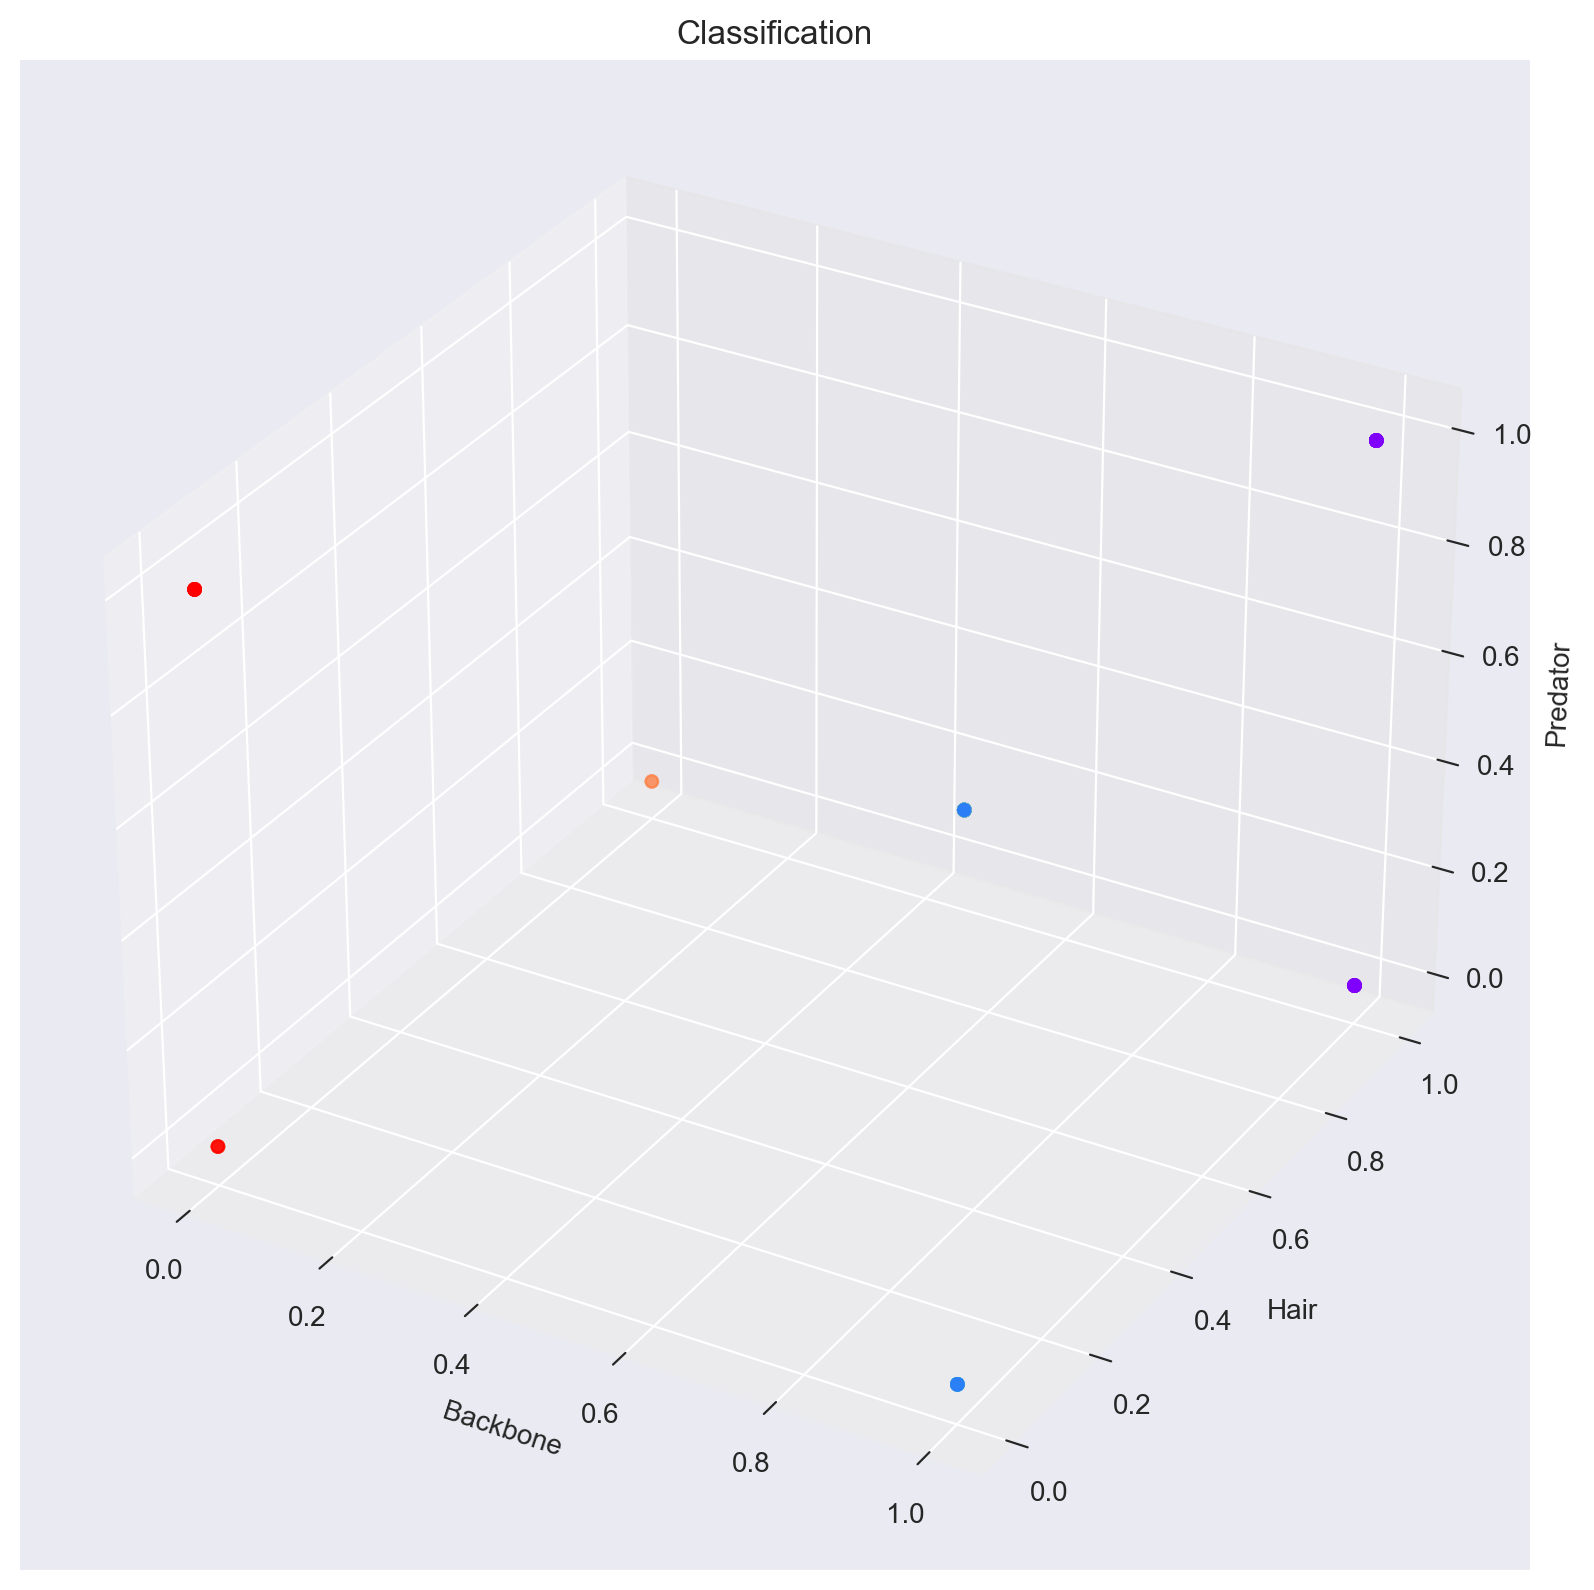

In [93]:
plt.figure(figsize=(10,10), dpi=200)

ax = plt.axes(projection ='3d')
ax.scatter3D(df.backbone, df.hair, df.predator, c = df.type, cmap='rainbow', linewidth=0.8)
ax.set_title('Classification')
ax.set_xlabel('Backbone')
ax.set_ylabel('Hair')
ax.set_zlabel('Predator')